In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

(sec:theory_randomAssignment)=
# Example: Simulating a Randomized Trial for a Vaccine

In a drug trial, volunteers for the trial either receive the new treatment or a placebo (a fake treatment), and researchers control the assignment of volunteers to groups. In a *randomized* controlled experiment, they use a chance process to make the assignment.  Scientists essentially use an urn model model to select the subjects for the treatment and control (those given the  placebo).  We can simulate the chance mechanism of the urn to better understand variation in the outcome of an experiment and the meaning of efficacy in clinical trials. 

In March 2021, Detroit Mayor Mike Duggan made national news when he turned down a shipment of over 6,000 Johnson & Johnson vaccine doses stating that the citizens of his city should "get the best". The mayor was referring to the efficacy rate of the vaccine, which was reported to be about 66%. In comparison, Moderna and Pfizer both reported efficacy rates of about 95% for their vaccines. 

On the surface, Duggan's reasoning seems valid, but the scope of the three clinical trials are not comparable, meaning direct comparisons of the experimental results is problematic {cite}`irfan2020`. Moreover, the Centers for Disease Control (CDC) considers a 66% efficacy rate quite good, which is why it was given emergency approval {cite}`cdc2021`.

We consider these points in turn, beginning with scope and then efficacy.

## Scope

Recall that when we evaluate the scope of the data, we consider the who, when, and where of the study. For the Johnson & Johnson clinical trial, the participants: 

+ included adults 18 and over, where roughly 40% had conditions, called comorbidities, associated with an increased risk for getting severe COVID-19;
+ enrolled in the study from October to November, 2020; and
+ came from 8 countries across 3 continents, including the US and South Africa.

The participants in the Moderna and Pfizer trials were primarily from the US, roughly 40% had comorbidities for severe COVID-19, and the trial took place earlier, over summer 2020. 
The timing and location of the trials make them difficult to compare.
Cases of COVID-19 were at a low point in the summer in the US, but they rose rapidly in the late fall.
Also, a variant of the virus that is more contagious was spreading rapidly in South Africa at the time of the J&J trial. 

Each clinical trial was designed to test a vaccine against the situation of no vaccine under similar circumstances through the random assignment of subjects to treatment and control groups. While the scope from one trial to the next are quite different, the randomization within a trial keeps the scope of the treatment and control groups roughly the same. This enables meaningful comparisons between groups in the same trial. The scope was different enough across the three vaccine trials to make direct comparisons of the three trials problematic.

In the trial carried out for the Johnson & Johnson vaccine, 43,738 people were enrolled {cite}`janssen2021`. These participants were split into two groups at random. Half received the new vaccine, and the other half received a placebo, such as a saline solution. Then, everyone was followed for 28 days to see whether they contracted COVID-19.

A lot of information was recorded on each patient, such as their age, race, and sex, and in addition,
whether they caught COVID, including the severity of the disease. At the end of 28 days, they found 468 cases of COVID-19, 117 of these were in the treatment group, and 351 in the control group.

The random assignment of patients to treatment and control, gives the scientists a framework to assess the effectiveness of the vaccine. The typical reasoning goes as follows:

+ Begin with the assumption that the vaccine is ineffective.
+ So, the 468 who caught COVID-19 would have caught it whether or not they received the vaccine.
+ And, the remaining 43,270 people in the trial who did not get sick would have remained healthy whether or not they received the vaccine.
+ The split of 117 sick people in treatment and 351 in control was solely due to the chance process in assigning participants to treatment or control.

We can set up an urn model that reflects this scenario and then study, via simulation, the behavior of the experimental results.  

## The Urn Model for Random Assignment

Our urn has 43,738 marbles, one for each person in the clinical trial. Since there were 468 cases of COVID-19 among them, we label 468 marbles with a 1 and the remaining 43,270 with 0. We draw half the marbles (21,869) from the urn to receive the treatment, and the remaining half receive the placebo. The results of the experiment are simply the count of the number of marbles marked 1 that were randomly drawn from the urn. 

We can simulate this process to get a sense of how likely it would be under these assumptions to draw at most 117 marbles marked 1 from the urn. Since we draw half of the marbles from the urn, we would expect about half of the 468, or 234, to be drawn. The simulation study gives us a sense of the variation that might result from the random assignment process. That is, the simulation can give us an approximate chance that the  trials would result in so few cases of the virus in the treatment group. 

:::{note}

There are several key assumptions that enter into this urn model, such as the assumption that the vaccine is ineffective.  It's important to keep track of the reliance on these assumptions because our simulation study gives us an approximation of the rarity of an outcome like the one observed only under these key assumptions. 

:::


As before, we can simulate the urn model using the hypergeometric probability distribution, rather than having to program the chance process from scratch.   

In [2]:
simulations_fast = np.random.hypergeometric(ngood=468, nbad=43270, nsample=21869, size=500000)

Text(0.5, 0, 'Cases in the Treatment Group')

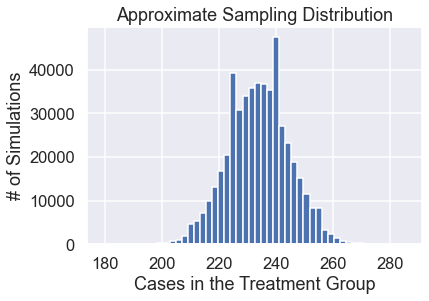

In [3]:
plt.hist(simulations_fast, bins=50)
#plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Cases in the Treatment Group')

In our simulation, we repeated the process of random assignment to the treatment group 500,000 times. Indeed, we found not one of the 500,000 simulations had 117 or fewer cases. It would be an extremely rare event to see so few cases of COVID-19, if in fact the vaccine was not effective.

After the problems with comparing drug trials that have different scopes and the efficacy for preventing severe cases of COVID-19 was explained, the Mayor of Detroit retracted his original statement, saying  “I have full confidence that the Johnson & Johnson vaccine is both safe and effective.” 

This example has shown that: 
+ Using a chance process in the assignment of subjects to treatments in clinical trials can help us answer what-if scenarios; 
+ Considering data scope can help us determine whether it is reasonable to compare figures from different datasets.